# Integration of Mechanical Systems

In this module, we will be exploring numerical integrators and how they perform for different mechanical systems.

## Simple Harmonic Oscillator

The simple harmonic oscillator is a simple physical system described by the second-order differential equation below. Despite its simplicity, this is a system that shows up in a similar form in many different fields of engineering. The same equation describes the behavior of a spring-mass-damper system, RLC circuit, or the motion of a (small-angle) pendulum.


![Image](figures/spring-mass-damper.png)

##### Figure 1. Diagram of Spring-Mass-Damper system (from https://en.wikipedia.org/wiki/Harmonic_oscillator)

The differential equation describing the motion of a simple harmonic oscillator is:

$$\begin{equation}
0 = m\ddot{x} + kx
\end{equation}$$

We can describe the state of the system by its position $x$ and its velocity $\dot{x}$. We will call this state vector $q$, as:

$$\begin{eqnarray}
\vec{q}  = \begin{bmatrix} x\\ \dot{x} \end{bmatrix}
\end{eqnarray}$$

This system can then be broken into two first order differential equations:

$$\begin{eqnarray}
\vec{\dot{q}}  = f(\vec{q}) = \begin{bmatrix} q_2\\ -\frac{k}{m}q_1 \end{bmatrix}
\end{eqnarray}$$

To look at the behavior of this system, we can start with some initial conditions for $q$, then use a numerical integration method such as Euler's method to integrate forward in time. 

### Equations of Motion from Lagrangian

You are encouraged to follow this derivation ON PAPER on your own. We gave you the equations of motion for a simple harmonic oscillator, but what if we don't have this equation? The following is a method that will work in nearly any situation to find equations of motion, often working well where a force analysis becomes difficult. This is good practice for anyone studying mechanics. To derive the equations of motion, we will start with the Lagrangian. This is defined by:

$$\begin{equation}
L = T- U
\end{equation}$$

where $T$ is the total Kinetic Energy in the system, and $U$ is the total Potential Energy. Potential energy is calculated as:

$$\begin{eqnarray*}
U &=& \frac{1}{2}kx^2\\
\end{eqnarray*}$$

Kinetic Energy is calculated as:

$$\begin{eqnarray*}
T &=& \frac{1}{2}mv^2 \\
&=& \frac{1}{2}m(\dot x)^2 
\end{eqnarray*}$$


So the Lagrangian quantity becomes:
$$\begin{equation}
L = \frac{1}{2}m(\dot x)^2  - \frac{1}{2}kx^2\\
\end{equation}$$




The equations of motion are then found using the Lagrange Equation:

$$\begin{equation}
\frac{d}{dt} \left( \frac{\partial L}{\partial \dot{x_i}}\right) - \frac{\partial L}{\partial x_i} = 0
\end{equation}$$

Since we have only one generalized coordinate (position), we need only one equation of motion. We'll calculate this in steps:

$$\begin{eqnarray*}
\frac{\partial L}{\partial \dot{x}} &=& m\dot{x} \\
\frac{d}{dt} \left( \frac{\partial L}{\partial \dot{x}}\right) &=& m\ddot{x}\\
-\frac{\partial L}{\partial x} &=& + kx
\end{eqnarray*}$$

We can add together the second and third equations to find the first equation of motion. Some of these terms will cancel out, and we are left with a final equation of motion:

$$\begin{equation}
0 = m\ddot{x} + kx
\end{equation}$$

This is the same equation we have before! So, we can be relatively confident that this derivation is correct.

## Integration Methods

### Euler's method

Euler's method is discussed in lesson 1 of the Numerical Methods course. The method goes as follows:
$$x_i^{n+1} = x_i^n + h\dot{x}_i^n$$

where $h$ is the timestep. This isn't a complicated scheme, so for details see the code below.

### Runge-Kutta Integration (RK4)

Depending on the application, Euler's method may provide enough accuracy with a small timestep, especially a simple harmonic oscillator. However, Euler is a first-order method and we can do better. One option is a Runge-Kutta scheme. This is a popular numerical integration method which is easily extended to higher orders. Here we will use a fourth order Runge-Kutta, also known as RK4:

$$\begin{equation}
q_{n+1} = q_n + \frac{h}{6}\left(k_1+2k_2+2k_3+k_4\right)
\end{equation}$$
where
$$\begin{eqnarray}
k_1 &=& f(t_n, x_n)\\
k_2 &=& f(t_n+\frac{h}{2}, x_n+\frac{h}{2}k_1)\\
k_3 &=& f(t_n+\frac{h}{2}, x_n+\frac{h}{2}k_2)\\
k_4 &=& f(t_n+h, y_n+hk_3)\\
t_{n+1} &=& t_n + h
\end{eqnarray}$$

For more information on the Runge-Kutta method, including the derivation and explanation of coefficients, see (cite)


### Symplectic Integrators

Symplectic integrators are similar to the methods discussed above, but they use equations of motion derived from Hamiltonian mechanics. According to [Berkeley source], syplectic integrators preserve the conserved Hamiltonian quantities. In practical terms, this works out to mean the methods reflect conservation of energy, down to a truncation error.

The Hamiltonian equations of motion can be derived from the total energy in the system, much like the Lagrangian. The coordinates we use are position ($q$) and momentum ($p = m\dot x$). The Hamiltonian is:
$$ H = T+V$$
where $T$ is the kinetic energy in the system, and $V$ is the potential energy in the system. So, we get:
$$\begin{eqnarray*}
T &=& \frac{1}{2}m\dot{x}^2 = \frac{p^2}{2m}\\
V &=& \frac{1}{2}k{x}^2 = \frac{kp^2}{2} \\
H &=& \frac{p^2}{2m} + \frac{kp^2}{2}
\end{eqnarray*}$$


The Hamilton's equations are:
$$\begin{eqnarray*}
\frac{dp}{dt} &=& -\frac{\partial H}{\partial q}\\
\frac{dq}{dt} &=& \frac{\partial H}{\partial p}
\end{eqnarray*}$$

So our equations of motion become:
$$\begin{equation*}
\begin{bmatrix} \dot p \\ \dot q \end{bmatrix} = \begin{bmatrix} -\frac{\partial H}{\partial q}\\ \frac{\partial H}{\partial p} \end{bmatrix} = \begin{bmatrix} -\frac{q}{m} \\ kp\end{bmatrix}
\end{equation*}$$

Let's now take a look at symplectic integration methods. We'll start with a first order method - symplectic Euler's method. This uses the equations:

$$\begin{eqnarray*}
p_{n+1} = p_n - h \frac{\partial H}{\partial q} \Bigr|_{p_{n+1},q_n}\\
q_{n+1} = q_n + \frac{h}{2} \frac{\partial H}{\partial p} \Bigr|_{p_{n+1},q_n}
\end{eqnarray*}$$

We can then plug in the partial derivatives and integrate the system. This system will do a better job of conserving energy than Euler's method, $\textit{but only to a truncation error.}$  Again, we can do better than first-order. Let's try a second-order symplectic scheme, also called Verlet integration. We'll have the same equations of motion, but this time a different set of integration equations:

$$\begin{eqnarray*}
p_{n+1/2} &=& p_n - \frac{h}{2} \frac{\partial H}{\partial q} \Bigr|_{p_{n+1/2},q_n}\\
q_{n+1} &=& q_n + \frac{h}{2} \left(\frac{\partial H}{\partial p} \Bigr|_{p_{n+1/2},q_n} +  \frac{\partial H}{\partial p} \Bigr|_{p_{n+1/2},q_{n+1/2}} \right) \\
p_{n+1} &=& p_{n+1/2} - \frac{h}{2} \frac{\partial H}{\partial q}\Bigr|_{p_{n+1/2},q_{n+1/2}}
\end{eqnarray*}$$

### Analytical Solution
The simple harmonic oscillator is a nice example for numerical integration, because it has an analytical form which we can compare to. The analytical solution is

$$\begin{equation}
x(t) = Acos(\omega_n t + \phi)
\end{equation}$$

where $\omega_n$ is the natural frequency of the system given by $\omega_n = \sqrt{\frac{k}{m}}$ . The amplitude, $A$, and the phase, $\phi$, of oscillation are determined from the initial conditions. 

### Let's Get to Programming

In [1]:
import numpy
from scipy.linalg import solve
from math import pi, cos, sin, sqrt

from matplotlib import pyplot
%matplotlib notebook
from matplotlib import rcParams, cm
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

/home/randy/anaconda3/lib/python3.4/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [44]:
#Set up parameters:

m = 3
k = 12;
g = -9.8 #[m/s**2]

T = 25; #[seconds]
dt = .01; #
N = int(T/dt)+1
t = numpy.linspace(0.0, T, N)



In [45]:
def euler(u, f, dt):
    """ Euler's method for integrating a system of differential equations.
    
    Parameters:
        u - state at current step 
        f - RHS of equation
        dt- time step size
    
    Returns: 
        x - array of values at time T.
    """
    
    return u + dt*f(u)    

In [46]:
def RK4(u, f, dt):
    k1 = f(u)
    k2 = f(u) + 0.5*dt*k1
    k3 = f(u) + 0.5*dt*k2
    k4 = f(u) + dt*k3
    
    return u + dt/6*(k1+2*k2+2*k3+k4)

In [47]:
def f_harmonic_oscillator(q):
    """Returns RHS of harmonic oscillator EOM
    
    Parameters:
        q - initial state
    
    Returns:
        f - RHS of harmonic oscillator eqn.
    
    """
    pos = q[0]
    vel = q[1]
    
    return numpy.array([vel, -k/m*pos])

In [60]:
def verlet_SHM(u, f, dt):
    """ Verlet integration for integrating from Hamiltonian equations of motion
    
    Parameters:
    
    Returns:
    """
    pos = u[0]
    mom = u[1]
    
    p_half = pos - dt/2*mom/m
    q_half = mom + dt/2*(k*pos)
    
    q = mom + dt/2*(2*k*p_half)
    p = p_half - dt/2*q/m
    
    return numpy.array([p, q]) 

In [61]:
#Initial Conditions
x0 = 0.5 #[m]
xdot0 = 0 #[m/s]

p0 = x0
q0 = m*xdot0

x_init = numpy.array([x0, xdot0])
x_init_H = numpy.array([p0, q0])

<IPython.core.display.Javascript object>


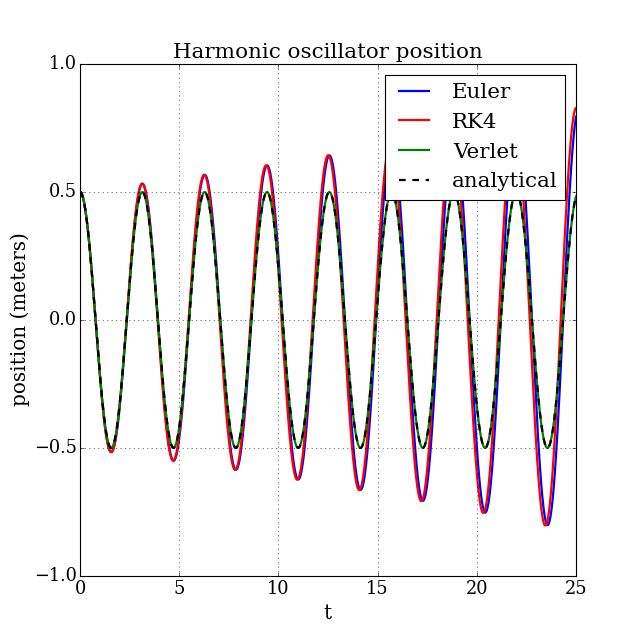

In [62]:
#Euler
q1 = numpy.zeros((N,2)) 
q1[0] = x_init.copy() #set initial conditions
for n in range(N-1):  #integrate with Euler
    q1[n+1] = euler(q1[n], f_harmonic_oscillator, dt)
    #print(q1[n])
    
#Runge-Kutta    
q2 = numpy.zeros((N,2))
q2[0] = x_init.copy()
for n in range(N-1):
    q2[n+1] = RK4(q2[n], f_harmonic_oscillator, dt)

#Symplectic

q3 = numpy.zeros((N,2))
q3[0] = x_init_H.copy()
for n in range(N-1):
    q3[n+1] = verlet_SHM(q3[n], f_harmonic_oscillator, dt)

#Analytical Solution    
A = x0 #with no forcing, the max amplitude is equal to initial amplitude
phi = 0
q_analytical = A*numpy.cos(numpy.sqrt(k/m)*t + phi)
    
pyplot.figure(figsize=(8,8))
pyplot.grid(True)
pyplot.xlabel(r't', fontsize=18)
pyplot.ylabel(r'position (meters)', fontsize=18)
pyplot.title('Harmonic oscillator position')
pyplot.plot(t, q1[:,0], lw=2, label='Euler')
pyplot.plot(t, q2[:,0], 'r-', lw=2, label='RK4')
pyplot.plot(t, q3[:,0], 'g', lw=2, label='Verlet')
pyplot.plot(t, q_analytical, 'k--', lw=2, label='analytical')
pyplot.legend();

### Adding a damping term

A more realistic oscillator also has a damping term. This might correspond to friction, or to some other non-conservative force. For now, we will assume that the damping is linear, and is proportional to the velocity (this is called the -- model of friction). We get the following equation of motion:

$$\begin{equation*}
0 = m\ddot{x} + c\dot{x} + kx
\end{equation*}$$

This gives us the differential equations:
$$\begin{eqnarray*}
\vec{\dot{q}}  = f(\vec{q}) = \begin{bmatrix} q_2\\ -\frac{c}{m}\dot{q_1} -\frac{k}{m}q_1 \end{bmatrix}
\end{eqnarray*}$$

The Euler's method and Runge-Kutta integration work the same way with this new equation. We also have a new analytical solution. Assuming the system is underdamped (add explanation of damping ratio), the solution becomes:


$$\begin{equation}
x(t) = Acos(\omega_d t + \phi)
\end{equation}$$

where $\omega_d = \omega_n\sqrt{1 - \zeta^2}$ is called the damped natural frequency.

The big change comes in the Hamiltonian equations. If these are dependent on convservation of energy, how do we deal with a system where energy is not conserved?

Our first step is to re-examine the Lagrangian. Since losses due to friction are neither potential nor kinetic energy, we'll need a new term. The Lagrangian equation of motion with non-conservative forces is:

$$\begin{equation}
\frac{d}{dt} \left( \frac{\partial L}{\partial \dot{x_i}}\right) - \frac{\partial L}{\partial x_i} = Q
\end{equation}$$

where $Q$ is the sum of all non-conservative forces. In this case, 
$$Q = c\frac{\partial x}{\partial t}$$

Now that we have this, we can add a similar term to the Hamiltonian equations of motion to deal with the same problem. For more information on the derivation of the Hamiltonian from the Lagrangian, see Tveter (cite). The Hamiltonian equations of motion become:

$$\begin{equation*}
\begin{bmatrix} \dot p \\ \dot q \end{bmatrix} = \begin{bmatrix} -\frac{\partial H}{\partial q} + Q\\ \frac{\partial H}{\partial p} \end{bmatrix} = \begin{bmatrix} -mg + \frac{c}{m}q \\ \frac{p}{m} \end{bmatrix}
\end{equation*}$$

From here, the we can use the same Verlet integration method as before.

### Duffing equation (Ading a non-linear damping term)

## Dynamics of a Double Pendulum

In this module, we will study the dynamics of a double pendulum. Like before, we'll derive the equations of motion from the Lagrangian and the Hamiltonian. We can use the same methods of integration as before, but this time there is no analytical solution to compare to. Finally, we will look at the properties of the system in phase space using phase plots and Poincare sections.

## Background

The double pendulum problem is a simple system which can produce surprisingly complex movements. It is a chaotic system, meaning it is unpredictable, and there is no closed form solution to the motion of the two masses. This is a frequent example problem in the study of dynamic systems, nonlinear controls, and mechanics.

In this notebook we will be treating the two rods as massless and ignoring the effects of friction. For a treatment of this problem without these assumptions, see (cite).

See the image below for the definition of constants.

![Image](figures/diagram.png)
#### Figure 1. Diagram of Double Pendulum System

## Equations of Motion 

As a reminder, the Lagrangian is
$$\begin{equation*}
L = T- U
\end{equation*}$$
where $T$ is the total Kinetic Energy in the system, and $U$ is the total Potential Energy. Potential energy is calculated as:

$$\begin{eqnarray*}
U &=& m_1g(-y_1) + m_2g(-y_2) \\
 &=& -m_1g(l_1cos(\theta_1) - m_2g(l_1cos\theta_1 + l_2cos\theta_2)
\end{eqnarray*}$$

Kinetic Energy is calculated as:

$$\begin{eqnarray*}
T &=& \frac{1}{2}mv_1^2+\frac{1}{2}mv_2^2 \\
&=& \frac{1}{2}m_1(l_1\dot\theta_1)^2 + \frac{1}{2}m_2(l_1\dot\theta_1 + l_2\dot\theta_2)^2 \\
&=& \frac{1}{2}(m_1+m_2)l_1^2\dot\theta_1^2+\frac{1}{2}m_2\left(2l_1l_2\dot\theta_1\dot\theta_2cos(\theta_2-\theta_1)+l_2^2\dot\theta_2^2\right)
\end{eqnarray*}$$


So the Lagrangian quantity becomes:
$$\begin{equation*}
L = \frac{1}{2}(m_1+m_2)l_1^2\dot\theta_1^2+m_2l_1l_2\dot\theta_1\dot\theta_2cos(\theta_2-\theta_1)+(m_1+m_2)l_1gcos\theta_1 + m_2l_2gcos\theta_2
\end{equation*}$$


The equations of motion are then found using the Lagrange Equation:

$$\begin{equation*}
\frac{d}{dt} \left( \frac{\partial L}{\partial \dot{x_i}}\right) - \frac{\partial L}{\partial x_i} = 0
\end{equation*}$$


There are two generalized coordinates ($\theta_1 and \theta_2$. So the equation of motion for $\theta_1$ is calculated by the following steps:

$$\begin{eqnarray*}
\frac{\partial L}{\partial \dot{\theta_1}} &=& (m_1+m_2)l_1^2\dot\theta_1+m_2l_1l_2\dot\theta_2cos(\theta_2-\theta_1) \\
\frac{d}{dt} \left( \frac{\partial L}{\partial \dot{\theta_1}}\right) &=& (m_1+m_2)l_1^2\ddot\theta_1+m_2l_1l_2\ddot\theta_2cos(\theta_2-\theta_1)-m_2l_1l_2\dot\theta_2^2sin(\theta_2-\theta_1)+m_2l_1l_2\dot\theta_1\dot\theta_2sin(\theta_2-\theta_1) \\
-\frac{\partial L}{\partial \theta_1} &=& -m_2l_1l_2\dot\theta_1\dot\theta_2sin(\theta_2-\theta_1)-(m_1+m_2)gl_1sin\theta_1
\end{eqnarray*}$$

We can add together the second and third equations to find the first equation of motion. Some of these terms will cancel out, and we are left with a final equation of motion:

$$\begin{equation*}
0 = (m_1+m_2)l_1^2\ddot\theta_1+m_2l_1l_2\ddot\theta_2cos(\theta_2-\theta_1)-m_2l_1l_2\dot\theta_2^2sin(\theta_2-\theta_1)+(m_1+m_2)gl_1sin\theta_1
\end{equation*}$$

We will also need the equation of motion for $\theta_2$. This can be derived using the same process. It should work out to the following (check this by yourself!):

$$\begin{equation*}
0 = m_2l_2^2\ddot\theta_2+m_2l_1l_2\ddot\theta_1cos(\theta_2-\theta_1) - m_2l_2l_1\dot\theta_1^2sin(\theta_2-\theta_1)+ l_2m_2gsin\theta_2
\end{equation*}$$

## Problem setup

Notice that these equations of motion are implicit equations for $\ddot\theta_1$ and $\ddot\theta_2$. We have talked about implicit equations in this class, and we solve them by forming a system of equations. In this case, we will need to solve the equations of motion at each time step. We will characterize our system in state space using the angle and angular velocity of each pendulum. So our state becomes:

$$\begin{eqnarray}
\vec{q}(t)  = \begin{pmatrix} \theta_1\\ \theta_2\\ \dot\theta_1 \\ \dot\theta_2 \end{pmatrix}
\end{eqnarray}$$

The equations of motion can be rewritten as a system of equations:

$$ A\dot q=f(q)$$

where 

\begin{equation*}
A = 
\left[\begin{array}{c}
1 &0 &0 &0 \\
0 &1 &0 &0 \\
0 &0 &(m_1+m_2)l_1^2 &m_2l_1l_2cos(x_2-x_1) \\
0 &0 &m_2l_1l_2cos(x_2-x_1) &m_2l_2^2
\end{array}\right]
\end{equation*}

and

$$\begin{eqnarray*}
f(\vec{q}(t))  = \begin{pmatrix} q_3\\ q_4\\ m_2l_1l_2x_4^2sin(q_2-q_1) -(m_1+m_2)gl_1sin(q_1)\\ m_2l_1l_2q_3^2sin(q_2-q_1)-l_2m_2gsinq_2 \end{pmatrix}
\end{eqnarray*}$$

In order to solve this, we can evaluate matrix A and vector $f(x)$ at each time step, then invert A and premultiply the result to each side of the equation. This gives us an explicit system of equations of motion:

$$ \dot q=A^{-1}f(q)$$

You may notice that these operations require a significant computational load at each time step. In order to reduce this, we can analytically invert the matrix A, then simply fill in the necessary values at each time step and multiply by $f(q)$. This will significantly speed up running time, as inverting a matrix is an expensive operation.


## Integration

For Euler and Runge-Kutta, we can use the equation above to integrate our system. The results will be VERY dependent on initial conditions; this is why we call it a chaotic system.

For the symplectic integrator, we'll need the equations of motion from the Hamiltonian. If you want good practice, you can derive these on your own. The Hamiltonian equations become:




## Solve!

Here we define functions for each of the integration methods, set our parameters and initial conditions, and then numerically integrate the motion of the pendulums. The plots below compare the different integration techniques.

Sources: 

http://scienceworld.wolfram.com/physics/DoublePendulum.html

http://www.phy.uct.ac.za/courses/opencontent/phylab2/worksheet9_09.pdf

http://www.phys.lsu.edu/faculty/gonzalez/Teaching/Phys7221/DoublePendulum.pdf

http://www.iontrap.wabash.edu/adlab/papers/F2011_foster_groninger_tang_chaos.pdf

https://math.berkeley.edu/~alanw/242papers99/markiewicz.pdf

http://www.unige.ch/~hairer/poly_geoint/week2.pdf

http://articles.adsabs.harvard.edu/cgi-bin/nph-iarticle_query?1994CeMDA..60..409T&defaultprint=YES&filetype=.pdf



In [ ]:
# This cell loads the style of the notebook, which is taken from the 
# Numerical Methods in Python Course: http://openedx.seas.gwu.edu/courses/GW/MAE6286/2014_fall/about

from IPython.core.display import HTML
css_file = './randy_schur/numericalmoocstyle.css'
HTML(open(css_file, "r").read())